<a href="https://colab.research.google.com/github/kurexi/fml-labs/blob/main/FML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5
## 1. Perceptron
### 1.1 Logical AND dataset
|A|B|A and b|
|---|---|----------:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

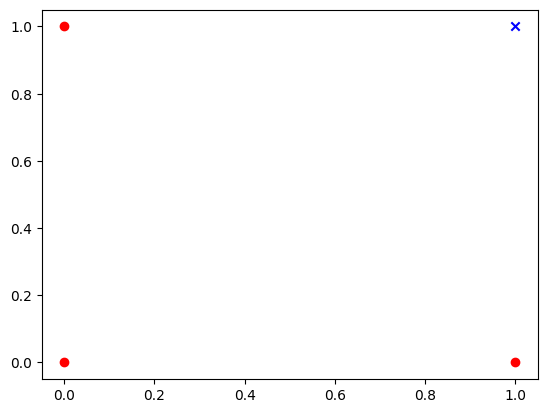

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create AND dataste
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
], dtype=float)

y = np.array([
    0,
    0,
    0,
    1
])

# Separate points by class
X0 = X[y == 0]
X1 = X[y == 1]

# Plot
plt.scatter(X0[:, 0], X0[:, 1], c='r', marker='o', label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='x', label="Class 1")

=== Learning Rate: 0.001 ===


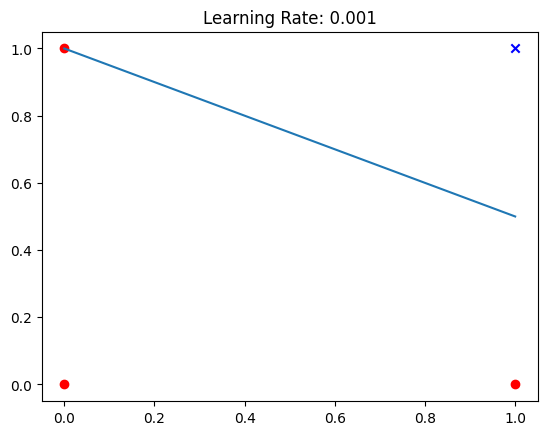

Epochs: 6
Accuracy: 1.0
=== Learning Rate: 0.01 ===


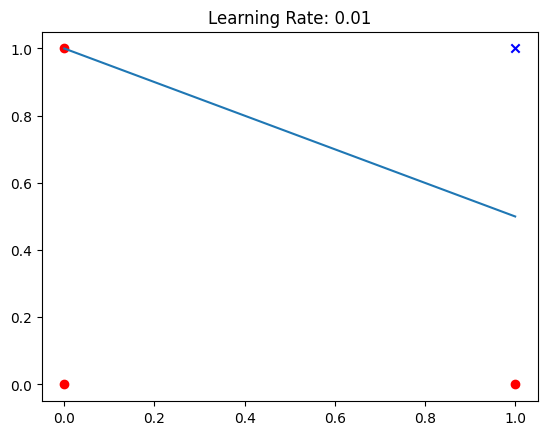

Epochs: 6
Accuracy: 1.0
=== Learning Rate: 0.1 ===


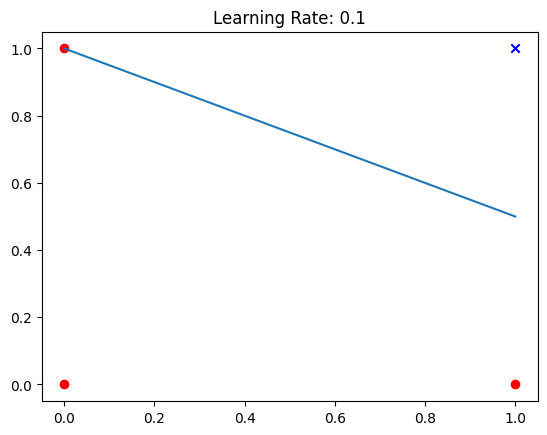

Epochs: 6
Accuracy: 1.0
=== Learning Rate: 1 ===


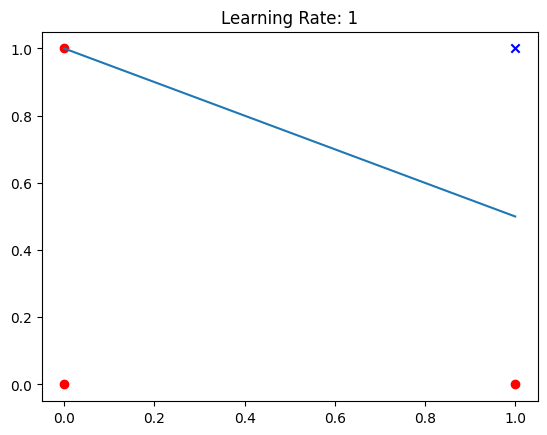

Epochs: 6
Accuracy: 1.0
=== Learning Rate: 10 ===


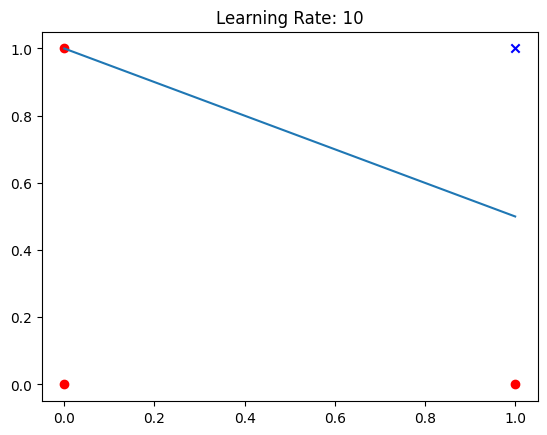

Epochs: 6
Accuracy: 1.0
=== Learning Rate: 100 ===


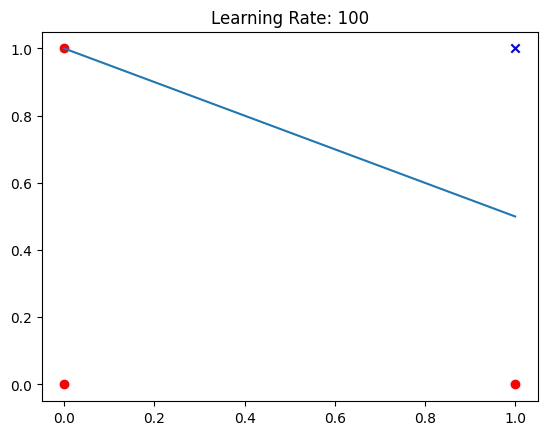

Epochs: 6
Accuracy: 1.0
=== Learning Rate: 1000 ===


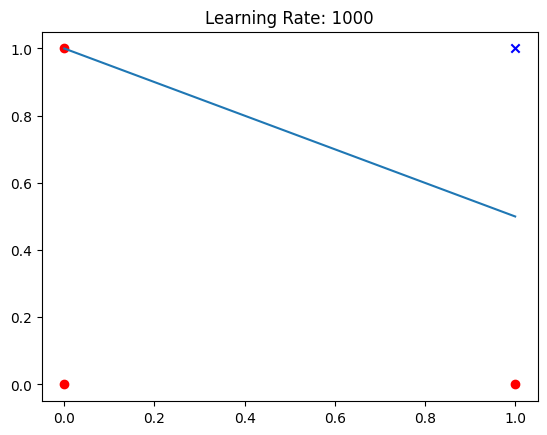

Epochs: 6
Accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score

def add_bias(X):
  return np.c_[np.ones(X.shape[0]), X]  # add bias

def predict(w, X, activation_function=lambda x: 1 if x > 0 else 0):
  Xb = add_bias(X)
  pred = Xb @ w

  vectorized_activation_function = np.vectorize(activation_function)
  return vectorized_activation_function(pred)

def learn(X, y, learning_rate, activation_function=lambda x: 1 if x > 0 else 0):
  # Perceptron algorithm from scratch
  Xb = add_bias(X)
  n, m = Xb.shape
  w = np.zeros(m)

  epochs = 0
  while True:
    loss = 0
    for i in range(n):
      pred = Xb[i] @ w
      pred = activation_function(pred)
      err = pred - y[i]
      loss += abs(err)

      for j in range(m):
        w[j] = w[j] - learning_rate * err * Xb[i, j]

    #print(w)
    epochs += 1
    if loss < 0.01 or epochs >= 1000:
      break
  return w, epochs

def visualize_boundary(w, X, y, title=""):
  X0 = X[y == 0]
  X1 = X[y == 1]
  plt.scatter(X0[:, 0], X0[:, 1], c='r', marker='o', label="Class 0")
  plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='x', label="Class 1")

  # decision boundary is at w0 + x1 * w1 + x2 * w2 = 0
  # then x1 = - (x2 * w2 + w0) / w1

  pltx = np.array([X[:, 0].min(),X[:, 0].max()])
  if w[1] != 0:
    plty = -(w[2] * pltx + w[0]) / w[1]
    plt.plot(pltx,plty)

  elif w[0] == 0 and w[1] == 0 and w[2] == 0:
    plty = 0 * pltx
    plt.plot(pltx,plty)

  plt.title(title)
  plt.show()

def evaluate(w, X, y):
  print(f"Accuracy: {accuracy_score(y, predict(w, X))}")

learning_rates = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for learning_rate in learning_rates:
  print(f"=== Learning Rate: {learning_rate} ===")
  w, epochs = learn(X, y, learning_rate=learning_rate)
  visualize_boundary(w, X, y, title=f"Learning Rate: {learning_rate}")
  print(f"Epochs: {epochs}")
  evaluate(w, X, y)

## 1.2 Logical XOR Dataset
|A|B|A xor B|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

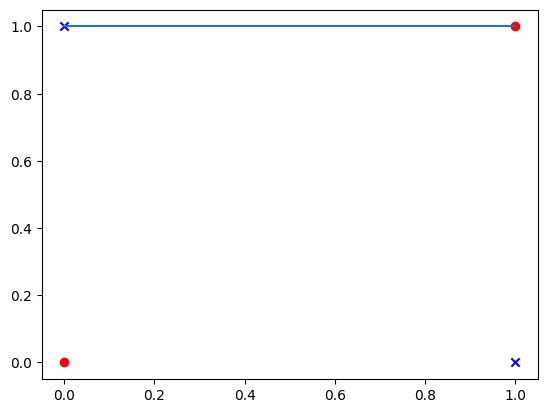

Accuracy: 0.5
Epochs: 1000


In [ ]:
# XOR data
y_xor = np.array([
    0,
    1,
    1,
    0
])

w, epochs = learn(X, y_xor, learning_rate=0.1)
visualize_boundary(w, X, y_xor)
evaluate(w, X, y_xor)
print(f"Epochs: {epochs}")

## Gaussian Dataset (scikit-learn)

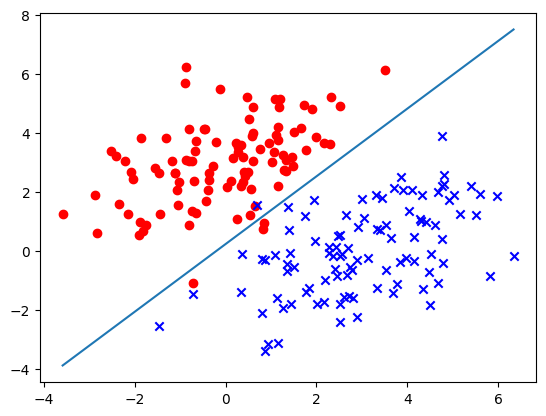

Accuracy: 0.98


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

m1 = np.array([0, 3])
m2 = np.array([3, 0])
C = np.array([[2, 1],
              [1, 2]])
n_samples = 100
# Generate samples
data1 = np.random.multivariate_normal(mean=m1, cov=C, size=n_samples)
data2 = np.random.multivariate_normal(mean=m2, cov=C, size=n_samples)

y1 = np.zeros(n_samples)
y2 = np.ones(n_samples)

X_gaussian = np.concatenate((data1,data2), axis=0)
y_gaussian = np.concatenate((y1,y2), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_gaussian, y_gaussian, test_size=0.3, random_state=42)

perceptron = Perceptron()

perceptron.fit(X_train, y_train)
score = perceptron.score(X_test, y_test)
coef_with_bias = np.concatenate((perceptron.intercept_, perceptron.coef_[0]), axis=0)

visualize_boundary(coef_with_bias, X_gaussian, y_gaussian)
evaluate(coef_with_bias, X_gaussian, y_gaussian)



# 2. Exploring Activation Function


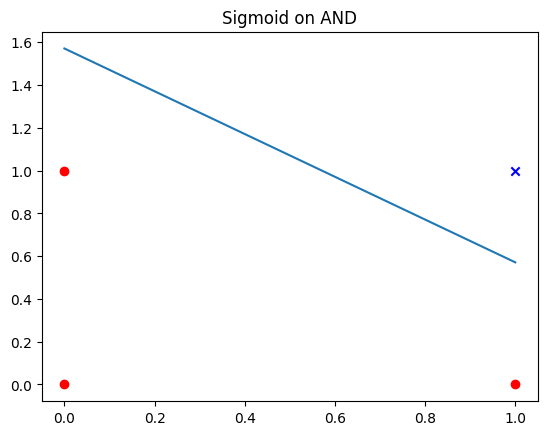

Epochs: 621
Accuracy: 1.0


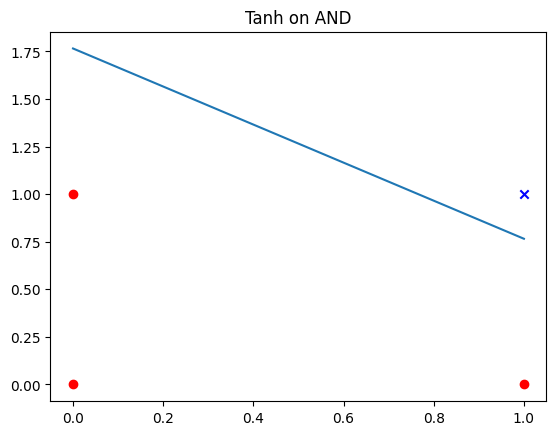

Epochs: 172
Accuracy: 1.0


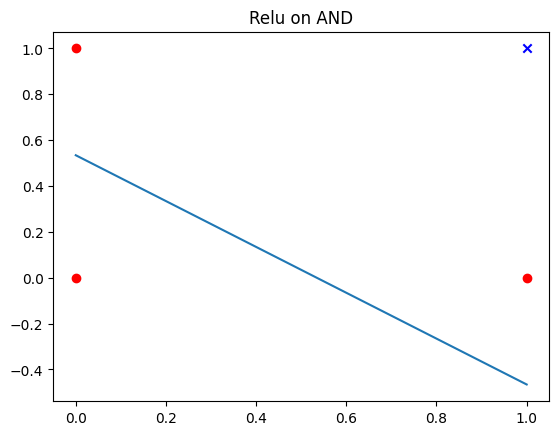

Epochs: 26
Accuracy: 0.5


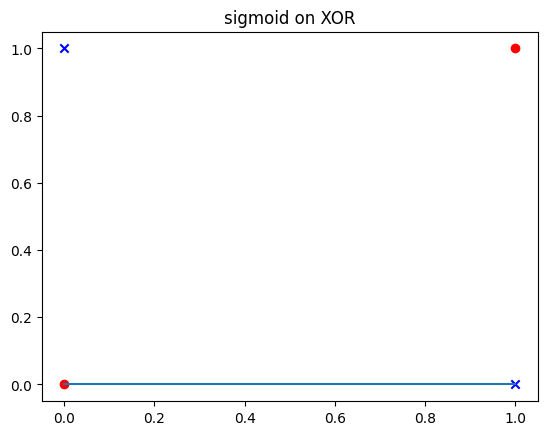

Epochs: 1000
Accuracy: 0.5


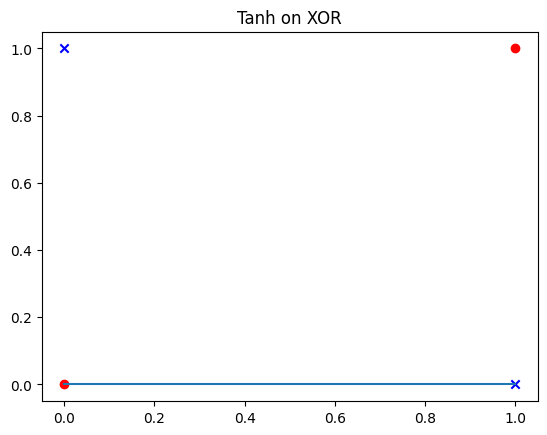

Epochs: 1000
Accuracy: 0.5


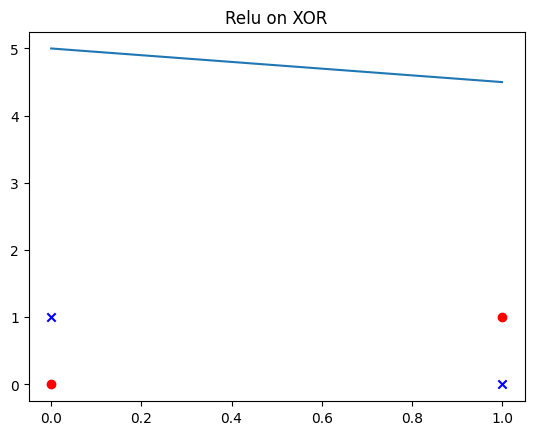

Epochs: 1000
Accuracy: 0.5


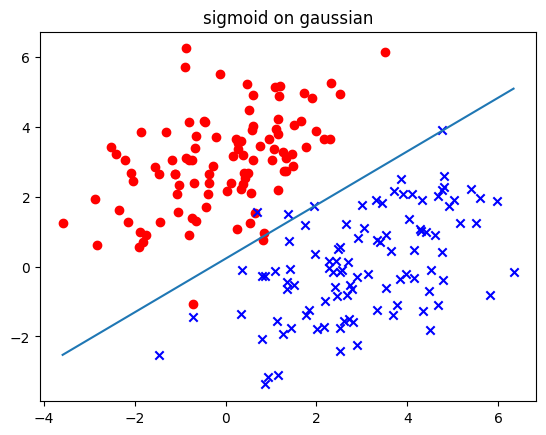

Epochs: 1000
Accuracy: 0.985


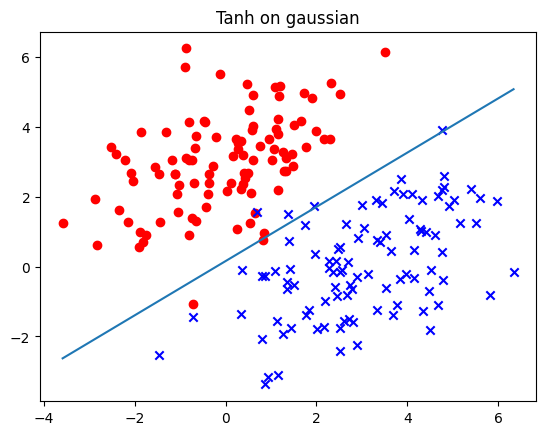

Epochs: 1000
Accuracy: 0.99


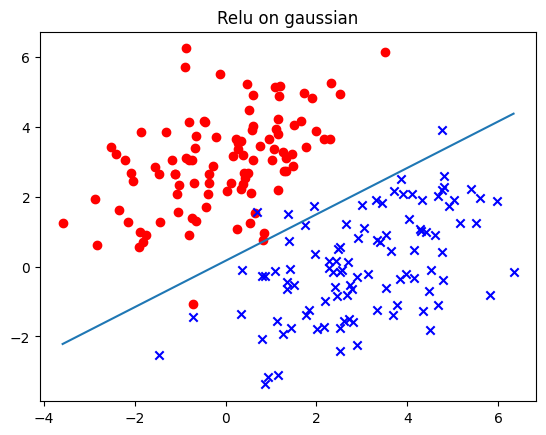

Epochs: 1000
Accuracy: 0.985


In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
  value = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  return value / 2 + 0.5

def relu(x):
  value = np.maximum(0, x)
  if value > 1:
    return 1
  return value

def sigmoid_gradient_unit(pred, err, x):
  return err * (pred - pred**2) * x

def tanh_gradient_unit(pred, err, x):
  return err * (1 - pred**2) * x / 2

def relu_gradient_unit(pred, err, x):
  value = (x > 0).astype(float)
  return err * value * x

def learn_gd(X, y, learning_rate, activation_function, gradient, max_error=0.1):
  # Perceptron algorithm with gradient descent
  Xb = add_bias(X)
  n, m = Xb.shape
  w = np.zeros(m)

  epochs = 0
  while True:
    loss = 0
    w_drivative = np.zeros(m)
    for i in range(n):
      pred = Xb[i] @ w
      pred = activation_function(pred)
      err = pred - y[i]
      loss += err * err
      w_drivative = w_drivative + gradient(pred, err, Xb[i])

    w = w - w_drivative * learning_rate
    loss = loss / 2
    #print(w)
    epochs += 1
    if loss <= max_error or epochs >= 1000:
      break
  return w, epochs

# sigmoid on AND
w, epoch = learn_gd(X, y, learning_rate=0.1, activation_function=sigmoid, gradient=sigmoid_gradient_unit)
visualize_boundary(w, X, y, title="Sigmoid on AND")
print(f"Epochs: {epoch}")
evaluate(w, X, y)


# tanh on AND
w, epoch = learn_gd(X, y, learning_rate=0.1, activation_function=tanh, gradient=tanh_gradient_unit)
visualize_boundary(w, X, y, title="Tanh on AND")
print(f"Epochs: {epoch}")
evaluate(w, X, y)

# relu on AND
w, epoch = learn_gd(X, y, learning_rate=0.1, activation_function=relu, gradient=relu_gradient_unit, max_error=0.1)
visualize_boundary(w, X, y, title="Relu on AND")
print(f"Epochs: {epoch}")
evaluate(w, X, y)

# sigmoid on XOR
w, epoch = learn_gd(X, y_xor, learning_rate=0.1, activation_function=sigmoid, gradient=sigmoid_gradient_unit)
visualize_boundary(w, X, y_xor, title="sigmoid on XOR")
print(f"Epochs: {epoch}")
evaluate(w, X, y_xor)

# tanh on XOR
w, epoch = learn_gd(X, y_xor, learning_rate=0.1, activation_function=tanh, gradient=tanh_gradient_unit)
visualize_boundary(w, X, y_xor, title="Tanh on XOR")
print(f"Epochs: {epoch}")
evaluate(w, X, y_xor)

# relu on XOR
w, epoch = learn(X, y_xor, learning_rate=0.1, activation_function=relu)
visualize_boundary(w, X, y_xor, title="Relu on XOR")
print(f"Epochs: {epoch}")
evaluate(w, X, y_xor)

# sigmoid on gaussian
w, epoch = learn_gd(X_gaussian, y_gaussian, learning_rate=0.1, activation_function=sigmoid, gradient=sigmoid_gradient_unit)
visualize_boundary(w, X_gaussian, y_gaussian, title="sigmoid on gaussian")
print(f"Epochs: {epoch}")
evaluate(w, X_gaussian, y_gaussian)

# tanh on gaussian
w, epoch = learn_gd(X_gaussian, y_gaussian, learning_rate=0.1, activation_function=tanh, gradient=tanh_gradient_unit)
visualize_boundary(w, X_gaussian, y_gaussian, title="Tanh on gaussian")
print(f"Epochs: {epoch}")
evaluate(w, X_gaussian, y_gaussian)

# relu on gaussian
w, epoch = learn_gd(X_gaussian, y_gaussian, learning_rate=0.1, activation_function=relu, gradient=relu_gradient_unit)
visualize_boundary(w, X_gaussian, y_gaussian, title="Relu on gaussian")
print(f"Epochs: {epoch}")
evaluate(w, X_gaussian, y_gaussian)

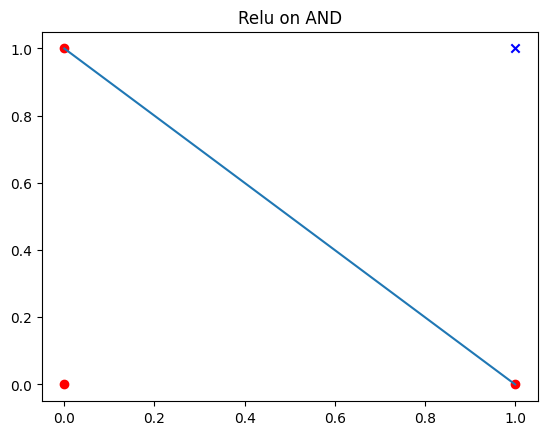

Epochs: 4
Accuracy: 1.0
[-1.  1.  1.]


In [ ]:
# relu on AND
w, epoch = learn_gd(X, y, learning_rate=1, activation_function=relu, gradient=relu_gradient_unit, max_error=0)
visualize_boundary(w, X, y, title="Relu on AND")
print(f"Epochs: {epoch}")
evaluate(w, X, y)
print(w)